## Observational Plotting Notebook

The previous notebooks have introduced you to the basics of python. In this notebook, we will be using those basic skills to produce a graph using real astronomical data.

You will find some data included with the starter pack. The names of the files are:

M13.csv

NGC2420.csv

NGC6791.csv

Each of these contains data on many stars - their colour and how bright they are.

## Task 1 

First, load the data from these three files. find out how long the files are, how many colums each has and the names of those columns. Write your code in the cell below.

Remember to use something like **genfromtxt** or **pandas** to load the data, and functions like **len** and **shape** to find the dimenstions of the data. The delimiter for this file is a comma ',' which will need to be specified when you load the data.

Give your data a meaningful title, so that you can tell them appart

In [1]:
# Import modules you will need for the project:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data to appropriate objects

M_13_data     = np.genfromtxt('M13.csv',delimiter=',',skip_header=1)
NGC_2420_data = np.genfromtxt('NGC2420.csv',delimiter=',',skip_header=1)
NGC_6791_data = np.genfromtxt('NGC6791.csv',delimiter=',',skip_header=1)

# Find the number of columns and rows in each

print(np.shape(M_13_data),' M_13_data')
print(np.shape(NGC_2420_data),' NGC_2420_data')
print(np.shape(NGC_6791_data),' NGC_6791_data')

(25240, 13)  M_13_data
(3071, 13)  NGC_2420_data
(10423, 13)  NGC_6791_data


In [3]:
# A different way of generating data:

with open('M13.csv','r') as M_13:
    headers = M_13.readline().rstrip()

    
# To obtain the individual headers, we split the headers list at ','

headers = headers.split(',')

# All of the headers are the same between the files
# we can just do this once for all of them

headers
#Demonstrating we have imported the headers correctly.

['DAOPHOTID',
 'RA',
 'DEC',
 'u',
 'uError',
 'g',
 'gError',
 'r',
 'rError',
 'i',
 'iError',
 'z',
 'zError']

## Task 2

Now that you have loaded the data, we will have to manipulate it to get the information we need.

We want two of the columns from this data: g and r. For each of the data sets, make an array of the g and r values from these files. You may also wish to make arrays of the other data in the file if you are interested in exploring the data more.

In [4]:
# find the position of g and r in the columns list by indexing our headers:

g_ind = headers.index('g')
r_ind = headers.index('r')

# Use these header indexes to find the data in the large arrays

g_M_13     = M_13_data[:,g_ind]
r_M_13     = M_13_data[:,r_ind]

g_NGC_2420 = NGC_2420_data[:,g_ind]
r_NGC_2420 = NGC_2420_data[:,r_ind]

g_NGC_6791 = NGC_6791_data[:,g_ind]
r_NGC_6791 = NGC_6791_data[:,r_ind]

## Task 3

Now that you have the data that you need, make a **scatter** plot of this data for each of the files. Make the **marker size** quite small (the data is quite closely grouped) around 0.05 is a good size to start with. Plot r on the y axis, and $g-r$ on the x.

Once this is done, set **limits** on the x and y axis where most of the data is found (some of the data is not physical, so you'll have to decide which ones to not include).

Also include **labels** on your axis, for easy reading.

How do the three plots compare? are there any similarities or differences?

Text(0.5,1,'M13 Cluster')

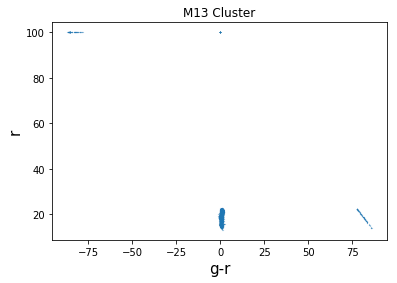

In [5]:
# Produce g-r array

g_r_M13 = g_M_13-r_M_13

# Plot: M_13 using matplotlib.pyplot.scatter

plt.scatter(g_r_M13,r_M_13,s=0.02)

#Here we are setting our limits on the x-axis.
#plt.xlim(-1,2)
#Here we are setting our limits on the y-axis.
#plt.ylim(12,23)
#Here we set the x-axis label.
plt.xlabel('g-r',fontsize=15)
#Here we set the y-axis label.
plt.ylabel('r',fontsize=15)
#Here we give our diagram a title.
plt.title('M13 Cluster')

## Task 4

Using the data loaded above we will attempt a new type of plot, a 2-d histogram. This will allow for data points to be grouped into bins. These bins will show different colours for different amounts of data within.

We will be using this to briefly explain how to read and use documentation.

The following link is the documentation for 2-d histograms: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html

As this function is part of matplotlib we will need to import the correct modules (matplotlib.pyplot).
At the start of the documentation we can see the keywords that fit this specific function. These keywords are further explained below the initial keyword listing. Specific examples of how the code functions can often be found after the important information about key values.

Some keywords are general over multiple functions (such as plotting styles) and are denoted by **kwargs

Using the above data create a 2-d histogram with right ascension on the x axis and declination on the y-axis.
This will give a positional plot of the three clusters of stars.

Using the same axis as the above task plot the stars positions with an overlay of $g-r$. This array has already been created as part of task 3.

This plot should be performed with scatter, using the keyword color and cmap. Ensure that your g-r, right ascension and declination arrays are the same length.

As a final task set your marker size to be defined by the luminosity of the star. This data can be found in the file.

Again ensure that your arrays are all the same length.

Text(0.5,1,'M13 Cluster')

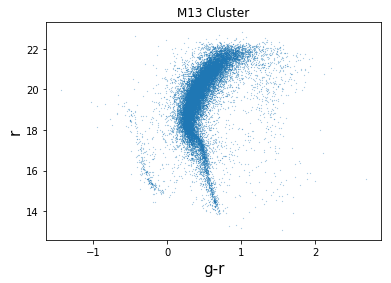

In [6]:
# Oops! There appears to be spurious data. In astronomy this happens a lot. Some data are not resolvable in certain filters in the SDSS telescope data.
# If a star's light is not bright enough for the telescope and filter used, it will blend with the background noise. 
# When this happens, the programmed "pipeline" (a piece of code that puts the observation data into an accessible format), will assign an unrealistic value (e.g. 99.99).

# We need to correct for this and remove the g-r values >50 and <-50. A simple way to do this is to use a numpy module called "where".
# "numpy.where()" allows us to write conditional boolean logic statements to produce an array of indicies where the conditions are met.
# For example if we have, testar = np.array([some values]), then we write condition = np.where(testar <= 10.0).
# The output of the array named"condition" will be a series of numbers that represent indicies of an array.
# So, if I were to print(testar[condition]), this will output the testar array where values are <= 10.0.

#Therefore

spurious_g13 = np.where(g_M_13 < 90.0) 

#Then, remake the arrays of our plot by reassigning the variables as below for g

g_M_13 = g_M_13[spurious_g13]
r_M_13 = r_M_13[spurious_g13]

#Now for r

spurious_r13 = np.where(r_M_13 < 90.0)

g_M_13 = g_M_13[spurious_r13]
r_M_13 = r_M_13[spurious_r13]

#Reassign g-r array

g_r_M13 = g_M_13 - r_M_13

#Now, let's try the plot again...

plt.scatter(g_r_M13,r_M_13,s=0.02)
#Here we set the x-axis label.
plt.xlabel('g-r',fontsize=15)
#Here we set the y-axis label.
plt.ylabel('r',fontsize=15)
#Here we give our diagram a title.
plt.title('M13 Cluster')